## This notebook contains all the evaluation results obtained by running all possible configurations using both atlases and tissue models.

In [1]:
import numpy as np
from EM import NiftiManager, Evaluate, EM, Plot
from glob import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
NM     = NiftiManager()
EVAL   = Evaluate()
PLOT   = Plot()

In [3]:
test_path = 'test-set/testing-images'
test_labels_path = 'test-set/testing-labels'
test_masks_path = 'test-set/testing-mask'

test_volumes = sorted(glob(os.path.join(test_path, "*.nii.gz"), recursive=True))
test_labels = sorted(glob(os.path.join(test_labels_path, "*.nii.gz"), recursive=True))
test_masks = sorted(glob(os.path.join(test_masks_path, "*.nii.gz"), recursive=True))

**Initialization: KMeans.** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.88981, 'GM': 0.582515, 'CSF': 0.040629}
Subject:  1004  Result:  {'WM': 0.874479, 'GM': 0.442957, 'CSF': 0.049957}
Subject:  1005  Result:  {'WM': 0.909003, 'GM': 0.931724, 'CSF': 0.761668}
Subject:  1018  Result:  {'WM': 0.889551, 'GM': 0.4992, 'CSF': 0.053039}
Subject:  1019  Result:  {'WM': 0.898873, 'GM': 0.565096, 'CSF': 0.036842}
Subject:  1023  Result:  {'WM': 0.891528, 'GM': 0.585467, 'CSF': 0.04046}
Subject:  1024  Result:  {'WM': 0.883622, 'GM': 0.478772, 'CSF': 0.044317}
Subject:  1025  Result:  {'WM': 0.899864, 'GM': 0.907645, 'CSF': 0.593551}
Subject:  1038  Result:  {'WM': 0.895545, 'GM': 0.596006, 'CSF': 0.069638}
Subject:  1039  Result:  {'WM': 0.879611, 'GM': 0.481934, 'CSF': 0.035597}
Subject:  1101  Result:  {'WM': 0.877154, 'GM': 0.641845, 'CSF': 0.113728}
Subject:  1104  Result:  {'WM': 0.88014, 'GM': 0.551677, 'CSF': 0.065286}
Subject:  1107  Result:  {'WM': 0.874791, 'GM': 0.521216, 'CSF': 0.061659}
Subject:  1110  Result:  {'WM'

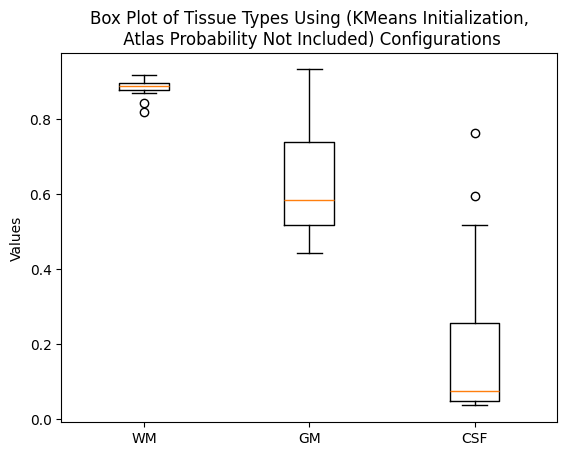

In [4]:
################################################
####### INIT=KMEANS, SINGLE MODALITY ###########
## ATLAS PROBABILITIES NOT INCLUDED, ONLY INIT##
# ##############################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "kmeans",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", test_volume.replace('\\','/').split('/')[-1].split('.')[0], " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="KMeans Initialization,\n Atlas Probability Not Included")

**Initialization: Tissue Models.** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.916551, 'GM': 0.945966, 'CSF': 0.0}
Subject:  1004  Result:  {'WM': 0.903407, 'GM': 0.938168, 'CSF': 0.55297}
Subject:  1005  Result:  {'WM': 0.899265, 'GM': 0.93468, 'CSF': 0.775674}
Subject:  1018  Result:  {'WM': 0.912155, 'GM': 0.941898, 'CSF': 0.377925}
Subject:  1019  Result:  {'WM': 0.909163, 'GM': 0.946412, 'CSF': 0.0}
Subject:  1023  Result:  {'WM': 0.904184, 'GM': 0.93857, 'CSF': 0.0}
Subject:  1024  Result:  {'WM': 0.915029, 'GM': 0.946174, 'CSF': 0.431251}
Subject:  1025  Result:  {'WM': 0.887794, 'GM': 0.934987, 'CSF': 0.82857}
Subject:  1038  Result:  {'WM': 0.912806, 'GM': 0.939932, 'CSF': 0.352653}
Subject:  1039  Result:  {'WM': 0.907837, 'GM': 0.943387, 'CSF': 0.0}
Subject:  1101  Result:  {'WM': 0.900181, 'GM': 0.937716, 'CSF': 0.693234}
Subject:  1104  Result:  {'WM': 0.89278, 'GM': 0.926846, 'CSF': 0.52784}
Subject:  1107  Result:  {'WM': 0.91018, 'GM': 0.900666, 'CSF': 0.145417}
Subject:  1110  Result:  {'WM': 0.915893, 'GM': 0.94

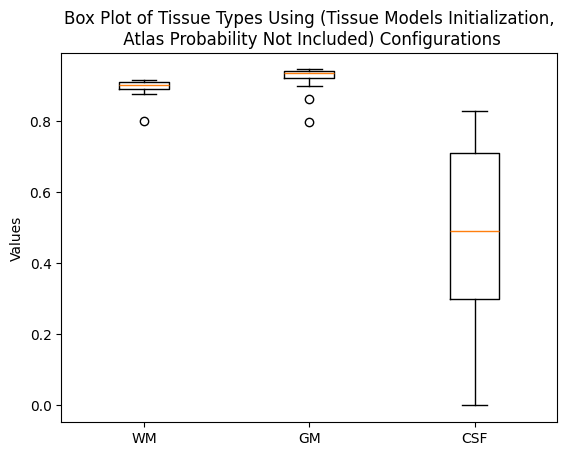

In [5]:
################################################
###### INIT=TISSUE MODELS, SINGLE MODALITY #####
## ATLAS PROBABILITIES NOT INCLUDED, ONLY INIT##
# ##############################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", test_volume.replace('\\','/').split('/')[-1].split('.')[0], " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Tissue Models Initialization,\n Atlas Probability Not Included")

**Initialization: Tissue Models.** \
**Atlas Probability: Included A Posteriori**

Subject:  1003  Result:  {'WM': 0.924607, 'GM': 0.907759, 'CSF': 0.142295}
Subject:  1004  Result:  {'WM': 0.874479, 'GM': 0.896159, 'CSF': 0.292616}
Subject:  1005  Result:  {'WM': 0.919066, 'GM': 0.934543, 'CSF': 0.7617}
Subject:  1018  Result:  {'WM': 0.923799, 'GM': 0.934839, 'CSF': 0.399417}
Subject:  1019  Result:  {'WM': 0.909163, 'GM': 0.871797, 'CSF': 0.100764}
Subject:  1023  Result:  {'WM': 0.917987, 'GM': 0.926926, 'CSF': 0.242222}
Subject:  1024  Result:  {'WM': 0.914348, 'GM': 0.935391, 'CSF': 0.426601}
Subject:  1025  Result:  {'WM': 0.908338, 'GM': 0.902611, 'CSF': 0.558173}
Subject:  1038  Result:  {'WM': 0.918469, 'GM': 0.937148, 'CSF': 0.496779}
Subject:  1039  Result:  {'WM': 0.925293, 'GM': 0.920132, 'CSF': 0.173794}
Subject:  1101  Result:  {'WM': 0.914999, 'GM': 0.94236, 'CSF': 0.75152}
Subject:  1104  Result:  {'WM': 0.863994, 'GM': 0.90289, 'CSF': 0.698159}
Subject:  1107  Result:  {'WM': 0.893511, 'GM': 0.859872, 'CSF': 0.173639}
Subject:  1110  Result:  {'WM'

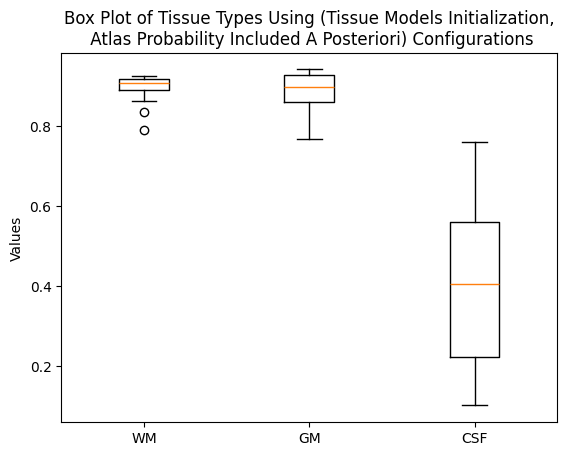

In [6]:
################################################
###### INIT=TISSUE MODELS, SINGLE MODALITY #####
### ATLAS PROBABILITIES INCLUDED POSTERIORI ####
# ##############################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", test_volume.replace('\\','/').split('/')[-1].split('.')[0], " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Tissue Models Initialization,\n Atlas Probability Included A Posteriori")

**Initialization: Atlas Only (Out Atlas).** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.904727, 'GM': 0.940768, 'CSF': 0.0}
Subject:  1004  Result:  {'WM': 0.914621, 'GM': 0.942812, 'CSF': 0.501181}
Subject:  1005  Result:  {'WM': 0.909008, 'GM': 0.937708, 'CSF': 0.759955}
Subject:  1018  Result:  {'WM': 0.912155, 'GM': 0.941301, 'CSF': 0.284014}
Subject:  1019  Result:  {'WM': 0.915895, 'GM': 0.948527, 'CSF': 0.0}
Subject:  1023  Result:  {'WM': 0.904185, 'GM': 0.938571, 'CSF': 0.0}
Subject:  1024  Result:  {'WM': 0.911734, 'GM': 0.945181, 'CSF': 0.373539}
Subject:  1025  Result:  {'WM': 0.908338, 'GM': 0.939386, 'CSF': 0.749389}
Subject:  1038  Result:  {'WM': 0.912801, 'GM': 0.939697, 'CSF': 0.32182}
Subject:  1039  Result:  {'WM': 0.907837, 'GM': 0.943387, 'CSF': 0.0}
Subject:  1101  Result:  {'WM': 0.900181, 'GM': 0.93587, 'CSF': 0.581089}
Subject:  1104  Result:  {'WM': 0.901012, 'GM': 0.938878, 'CSF': 0.52784}
Subject:  1107  Result:  {'WM': 0.874791, 'GM': 0.923972, 'CSF': 0.0}
Subject:  1110  Result:  {'WM': 0.923248, 'GM': 0.947

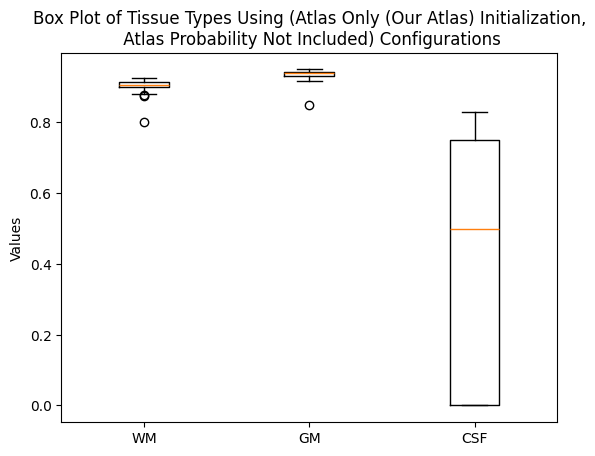

In [7]:
####################################################
########### INIT=ATLAS, SINGLE MODALITY ############
### ATLAS PROBABILITIES NOT INCLUDED, ONLY INIT ####
####################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_gm/result.nii')[0],
        # include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas Only (Our Atlas) Initialization,\n Atlas Probability Not Included")

**Initialization: Atlas Only (Out Atlas).** \
**Atlas Probability: Included A Posteriori**

Subject:  1003  Result:  {'WM': 0.934335, 'GM': 0.950166, 'CSF': 0.344315}
Subject:  1004  Result:  {'WM': 0.937324, 'GM': 0.959639, 'CSF': 0.701562}
Subject:  1005  Result:  {'WM': 0.930243, 'GM': 0.955402, 'CSF': 0.810207}
Subject:  1018  Result:  {'WM': 0.931943, 'GM': 0.956697, 'CSF': 0.64499}
Subject:  1019  Result:  {'WM': 0.941427, 'GM': 0.966264, 'CSF': 0.65065}
Subject:  1023  Result:  {'WM': 0.931252, 'GM': 0.956672, 'CSF': 0.550479}
Subject:  1024  Result:  {'WM': 0.942551, 'GM': 0.964562, 'CSF': 0.642098}
Subject:  1025  Result:  {'WM': 0.92762, 'GM': 0.956294, 'CSF': 0.792987}
Subject:  1038  Result:  {'WM': 0.931774, 'GM': 0.955366, 'CSF': 0.669962}
Subject:  1039  Result:  {'WM': 0.937787, 'GM': 0.962448, 'CSF': 0.642539}
Subject:  1101  Result:  {'WM': 0.932967, 'GM': 0.95842, 'CSF': 0.831251}
Subject:  1104  Result:  {'WM': 0.931746, 'GM': 0.959646, 'CSF': 0.786205}
Subject:  1107  Result:  {'WM': 0.910457, 'GM': 0.926493, 'CSF': 0.364469}
Subject:  1110  Result:  {'WM

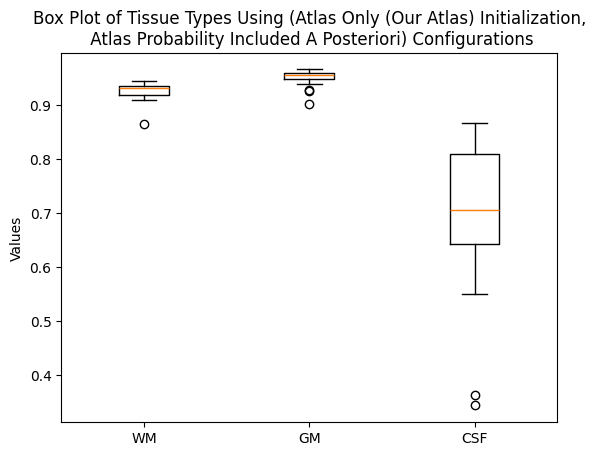

In [8]:
####################################################
########### INIT=ATLAS, SINGLE MODALITY ############
######## ATLAS PROBABILITIES INCLUDED ##############
####################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_gm/result.nii')[0],
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas Only (Our Atlas) Initialization,\n Atlas Probability Included A Posteriori")

**Initialization: Atlas (Out Atlas) + Tissue Models.** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.904727, 'GM': 0.940768, 'CSF': 0.0}
Subject:  1004  Result:  {'WM': 0.914621, 'GM': 0.942812, 'CSF': 0.501181}
Subject:  1005  Result:  {'WM': 0.899265, 'GM': 0.933977, 'CSF': 0.759955}
Subject:  1018  Result:  {'WM': 0.912155, 'GM': 0.941304, 'CSF': 0.28411}
Subject:  1019  Result:  {'WM': 0.909162, 'GM': 0.946412, 'CSF': 0.0}
Subject:  1023  Result:  {'WM': 0.904184, 'GM': 0.939034, 'CSF': 0.161491}
Subject:  1024  Result:  {'WM': 0.911734, 'GM': 0.945181, 'CSF': 0.373539}
Subject:  1025  Result:  {'WM': 0.887792, 'GM': 0.93131, 'CSF': 0.728803}
Subject:  1038  Result:  {'WM': 0.912806, 'GM': 0.939696, 'CSF': 0.321911}
Subject:  1039  Result:  {'WM': 0.907837, 'GM': 0.943387, 'CSF': 0.0}
Subject:  1101  Result:  {'WM': 0.890304, 'GM': 0.932002, 'CSF': 0.581089}
Subject:  1104  Result:  {'WM': 0.902899, 'GM': 0.938067, 'CSF': 0.504029}
Subject:  1107  Result:  {'WM': 0.894309, 'GM': 0.931471, 'CSF': 0.0}
Subject:  1110  Result:  {'WM': 0.92341, 'GM': 

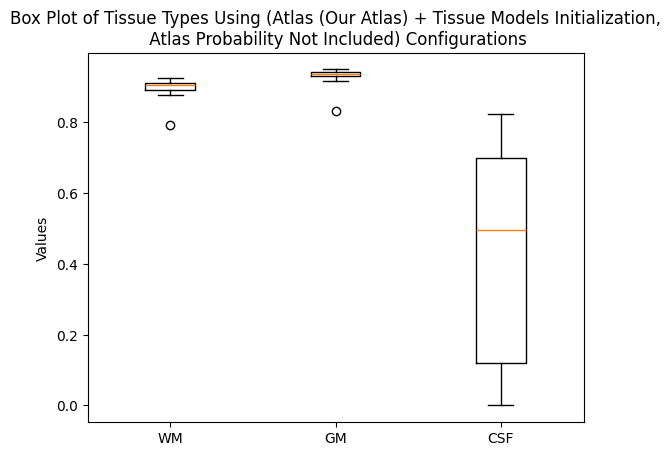

In [9]:
##################################################################
########### INIT=tissue_models_atlas, SINGLE MODALITY ############
######## ATLAS PROBABILITIES NOT INCLUDED ########################
##################################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_gm/result.nii')[0],
        # include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas (Our Atlas) + Tissue Models Initialization,\n Atlas Probability Not Included")

**Initialization: Atlas (Out Atlas) + Tissue Models.** \
**Atlas Probability: Included A Posteriori**

Subject:  1003  Result:  {'WM': 0.947717, 'GM': 0.956709, 'CSF': 0.358067}
Subject:  1004  Result:  {'WM': 0.942342, 'GM': 0.963529, 'CSF': 0.792909}
Subject:  1005  Result:  {'WM': 0.931516, 'GM': 0.956739, 'CSF': 0.825748}
Subject:  1018  Result:  {'WM': 0.949074, 'GM': 0.965473, 'CSF': 0.714524}
Subject:  1019  Result:  {'WM': 0.941935, 'GM': 0.967264, 'CSF': 0.72365}
Subject:  1023  Result:  {'WM': 0.943422, 'GM': 0.96271, 'CSF': 0.625117}
Subject:  1024  Result:  {'WM': 0.944706, 'GM': 0.964662, 'CSF': 0.718801}
Subject:  1025  Result:  {'WM': 0.918533, 'GM': 0.953594, 'CSF': 0.809891}
Subject:  1038  Result:  {'WM': 0.94424, 'GM': 0.961547, 'CSF': 0.734399}
Subject:  1039  Result:  {'WM': 0.946638, 'GM': 0.967059, 'CSF': 0.685071}
Subject:  1101  Result:  {'WM': 0.935618, 'GM': 0.959501, 'CSF': 0.740335}
Subject:  1104  Result:  {'WM': 0.910857, 'GM': 0.942243, 'CSF': 0.722809}
Subject:  1107  Result:  {'WM': 0.929838, 'GM': 0.932783, 'CSF': 0.364507}
Subject:  1110  Result:  {'W

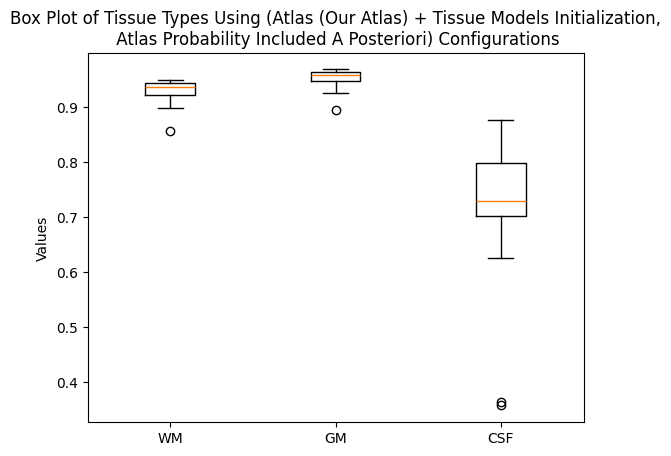

In [10]:
##################################################################
########### INIT=tissue_models_atlas, SINGLE MODALITY ############
############ ATLAS PROBABILITIES INCLUDED ########################
##################################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_gm/result.nii')[0],
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas (Our Atlas) + Tissue Models Initialization,\n Atlas Probability Included A Posteriori")

**Initialization: Atlas Only (MNITemplateAtlas).** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.904727, 'GM': 2.1e-05, 'CSF': 0.022177}
Subject:  1004  Result:  {'WM': 0.903406, 'GM': 0.0, 'CSF': 0.032004}
Subject:  1005  Result:  {'WM': 0.909006, 'GM': 0.940478, 'CSF': 0.843213}
Subject:  1018  Result:  {'WM': 0.902395, 'GM': 4.3e-05, 'CSF': 0.032572}
Subject:  1019  Result:  {'WM': 0.909159, 'GM': 1.3e-05, 'CSF': 0.021351}
Subject:  1023  Result:  {'WM': 0.904185, 'GM': 0.0, 'CSF': 0.021743}
Subject:  1024  Result:  {'WM': 0.905127, 'GM': 0.941275, 'CSF': 0.0}
Subject:  1025  Result:  {'WM': 0.899864, 'GM': 0.932741, 'CSF': 0.761236}
Subject:  1038  Result:  {'WM': 0.905404, 'GM': 6e-06, 'CSF': 0.038126}
Subject:  1039  Result:  {'WM': 0.907787, 'GM': 3e-06, 'CSF': 0.023441}
Subject:  1101  Result:  {'WM': 0.890301, 'GM': 0.934595, 'CSF': 0.734296}
Subject:  1104  Result:  {'WM': 0.889812, 'GM': 0.000101, 'CSF': 0.02557}
Subject:  1107  Result:  {'WM': 0.88555, 'GM': 9e-06, 'CSF': 0.039338}
Subject:  1110  Result:  {'WM': 0.923424, 'GM': 6.5e-0

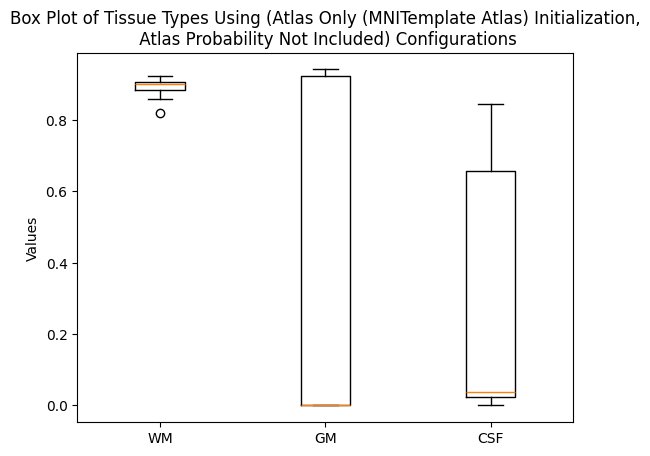

In [11]:
####################################################
######### INIT=MNI ATLAS, SINGLE MODALITY ##########
### ATLAS PROBABILITIES NOT INCLUDED, ONLY INIT ####
####################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_gm/result.nii')[0],
        # include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas Only (MNITemplate Atlas) Initialization,\n Atlas Probability Not Included")

**Initialization: Atlas Only (MNITemplateAtlas).** \
**Atlas Probability: Included A Posteriori**

Subject:  1003  Result:  {'WM': 0.863951, 'GM': 0.886415, 'CSF': 0.076616}
Subject:  1004  Result:  {'WM': 0.862921, 'GM': 0.882202, 'CSF': 0.073935}
Subject:  1005  Result:  {'WM': 0.880001, 'GM': 0.88643, 'CSF': 0.390936}
Subject:  1018  Result:  {'WM': 0.854189, 'GM': 0.884935, 'CSF': 0.073925}
Subject:  1019  Result:  {'WM': 0.866219, 'GM': 0.892583, 'CSF': 0.0661}
Subject:  1023  Result:  {'WM': 0.866771, 'GM': 0.892132, 'CSF': 0.078848}
Subject:  1024  Result:  {'WM': 0.874166, 'GM': 0.895681, 'CSF': 0.072143}
Subject:  1025  Result:  {'WM': 0.878846, 'GM': 0.886273, 'CSF': 0.374177}
Subject:  1038  Result:  {'WM': 0.853735, 'GM': 0.88024, 'CSF': 0.075648}
Subject:  1039  Result:  {'WM': 0.857985, 'GM': 0.885608, 'CSF': 0.064569}
Subject:  1101  Result:  {'WM': 0.867396, 'GM': 0.895204, 'CSF': 0.206863}
Subject:  1104  Result:  {'WM': 0.861386, 'GM': 0.89343, 'CSF': 0.078343}
Subject:  1107  Result:  {'WM': 0.829812, 'GM': 0.856116, 'CSF': 0.097069}
Subject:  1110  Result:  {'WM'

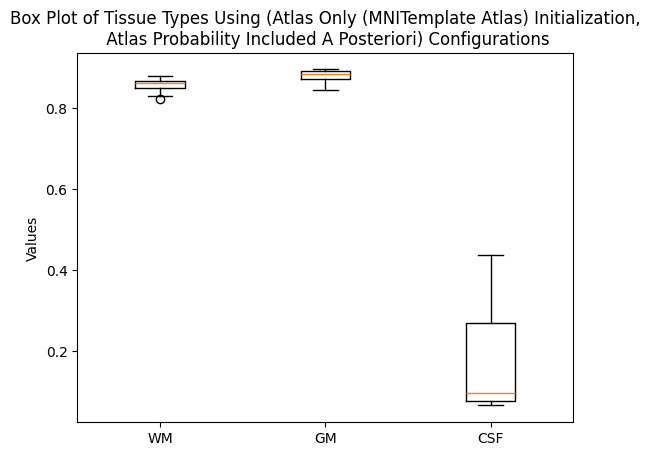

In [12]:
####################################################
######### INIT=MNI ATLAS, SINGLE MODALITY ##########
######### ATLAS PROBABILITIES INCLUDED #############
####################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_gm/result.nii')[0],
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas Only (MNITemplate Atlas) Initialization,\n Atlas Probability Included A Posteriori")

**Initialization: Atlas (MNITemplateAtlas) + Tissue Models.** \
**Atlas Probability: Not Included**

Subject:  1003  Result:  {'WM': 0.916549, 'GM': 2.3e-05, 'CSF': 0.022623}
Subject:  1004  Result:  {'WM': 0.903395, 'GM': 0.00016, 'CSF': 0.020335}
Subject:  1005  Result:  {'WM': 0.909004, 'GM': 0.940478, 'CSF': 0.843206}
Subject:  1018  Result:  {'WM': 0.912153, 'GM': 0.000121, 'CSF': 0.025419}
Subject:  1019  Result:  {'WM': 0.909159, 'GM': 1.3e-05, 'CSF': 0.021351}
Subject:  1023  Result:  {'WM': 0.913446, 'GM': 4.4e-05, 'CSF': 0.022191}
Subject:  1024  Result:  {'WM': 0.91173, 'GM': 0.000144, 'CSF': 0.019928}
Subject:  1025  Result:  {'WM': 0.887784, 'GM': 0.928359, 'CSF': 0.761219}
Subject:  1038  Result:  {'WM': 0.912782, 'GM': 1.7e-05, 'CSF': 0.029125}
Subject:  1039  Result:  {'WM': 0.917213, 'GM': 3e-06, 'CSF': 0.023866}
Subject:  1101  Result:  {'WM': 0.890301, 'GM': 0.934822, 'CSF': 0.746401}
Subject:  1104  Result:  {'WM': 0.901028, 'GM': 0.000203, 'CSF': 0.020327}
Subject:  1107  Result:  {'WM': 0.89431, 'GM': 9e-06, 'CSF': 0.039916}
Subject:  1110  Result:  {'WM': 0.9033

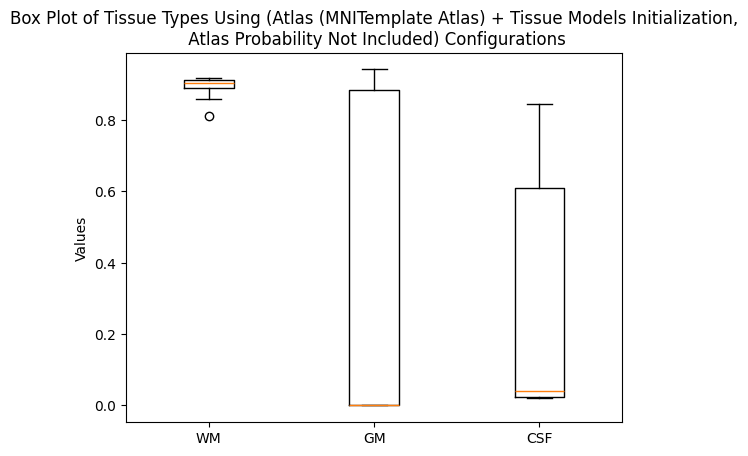

In [13]:
##############################################################################
######### INIT=MNI ATLAS (tissue_models_atlas), SINGLE MODALITY #############
############# ATLAS PROBABILITIES NOT INCLUDED, ONLY INIT ####################
##############################################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_gm/result.nii')[0],
        # include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas (MNITemplate Atlas) + Tissue Models Initialization,\n Atlas Probability Not Included")

**Initialization: Atlas (MNITemplateAtlas) + Tissue Models.** \
**Atlas Probability: Included A Posteriori**

Subject:  1003  Result:  {'WM': 0.884867, 'GM': 0.894623, 'CSF': 0.078479}
Subject:  1004  Result:  {'WM': 0.872674, 'GM': 0.888705, 'CSF': 0.117081}
Subject:  1005  Result:  {'WM': 0.876905, 'GM': 0.887525, 'CSF': 0.344327}
Subject:  1018  Result:  {'WM': 0.882864, 'GM': 0.896942, 'CSF': 0.116526}
Subject:  1019  Result:  {'WM': 0.866111, 'GM': 0.893042, 'CSF': 0.074009}
Subject:  1023  Result:  {'WM': 0.887939, 'GM': 0.899543, 'CSF': 0.081187}
Subject:  1024  Result:  {'WM': 0.883204, 'GM': 0.896573, 'CSF': 0.101122}
Subject:  1025  Result:  {'WM': 0.860196, 'GM': 0.880764, 'CSF': 0.334301}
Subject:  1038  Result:  {'WM': 0.876918, 'GM': 0.889142, 'CSF': 0.12126}
Subject:  1039  Result:  {'WM': 0.875985, 'GM': 0.892291, 'CSF': 0.066908}
Subject:  1101  Result:  {'WM': 0.878153, 'GM': 0.896583, 'CSF': 0.160112}
Subject:  1104  Result:  {'WM': 0.855086, 'GM': 0.879512, 'CSF': 0.108863}
Subject:  1107  Result:  {'WM': 0.873939, 'GM': 0.86803, 'CSF': 0.101529}
Subject:  1110  Result:  {'

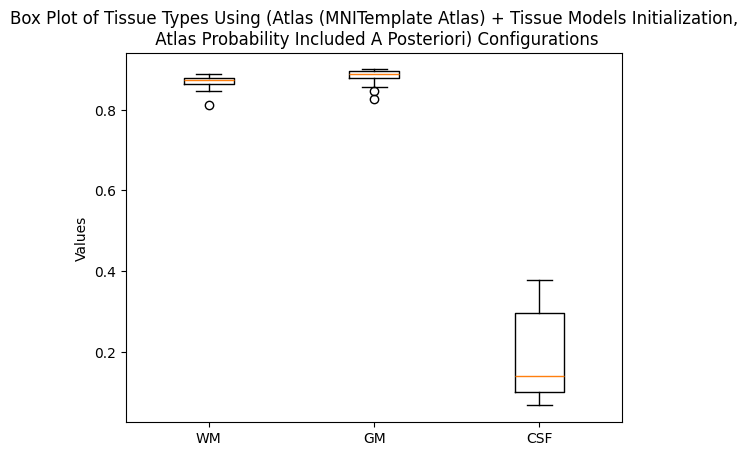

In [14]:
##############################################################################
######### INIT=MNI ATLAS (tissue_models_atlas), SINGLE MODALITY #############
##################### ATLAS PROBABILITIES INCLUDED ###########################
##############################################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]
    
    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/MNITemplateAtlas/mean_gm/result.nii')[0],
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    dice_coefficients = EVAL.evaluate_dice_volumes(segmentation_result, labels_nifti, labels={'BG':0, 'CSF':1, 'WM':2, 'GM':3})

    WM_DICE.append(dice_coefficients['WM'])
    GM_DICE.append(dice_coefficients['GM'])
    CSF_DICE.append(dice_coefficients['CSF'])
    
    print("Subject: ", file_name, " Result: ", dice_coefficients)

print('--------------------------------------------------------------------------------------------------------')
print(f'WM mean: {round(np.mean(WM_DICE), 6)}, \t WM STD: {round(np.std(WM_DICE), 6)}')
print(f'GM mean: {round(np.mean(GM_DICE), 6)}, \t GM STD: {round(np.std(GM_DICE), 6)}')
print(f'CSF mean: {round(np.mean(CSF_DICE), 6)},\t CSF STD: {round(np.std(CSF_DICE), 6)}')

PLOT.plot_boxplot_per_tissue(WM_DICE, GM_DICE, CSF_DICE, config="Atlas (MNITemplate Atlas) + Tissue Models Initialization,\n Atlas Probability Included A Posteriori")